In [174]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.base import TransformerMixin

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luisfetoga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
data = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')

In [176]:
data_train, data_test = train_test_split(data, test_size=0.2)
x_train, x_test = data_train["Review"], data_test["Review"]
y_train, y_test = data_train["Class"], data_test["Class"]

In [177]:
class limpieza:
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer

    def solo_letras(self, texto):
        abc = "abcdefghijklmnñopqrstuvwxyz"
        new_texto = ""
        for i in range(len(texto)):
            if texto[i] not in abc:
                new_texto += " "
            else:
                new_texto += texto[i]
        return new_texto

    def limpiar(self):
        self.data = self.data.str.lower()
        self.data = self.data.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u")
        self.data = self.data.apply(lambda x: self.solo_letras(x))
        return self.data
    
    def stopwords(self):
        stop = stopwords.words("spanish")
        self.data = self.data.apply(lambda x: " ".join([item for item in x.split() if item not in stop]))
        return self.data
    
    def vectorizacion(self):
        self.data = self.vectorizer.transform(self.data)
        return self.data
    
    def fit(self, data):
        self.data = data
        self.limpiar()
        self.stopwords()
        self.vectorizer.fit(self.data)
        self.vectorizacion()
        return self.data
    
    def transform(self, data):
        self.data = data
        self.limpiar()
        self.stopwords()
        self.vectorizacion()
        return self.data


In [178]:
class CustomTransformer(TransformerMixin):
    def __init__(self, limpieza_instance):
        self.limpieza_instance = limpieza_instance
        
    def fit(self, X, y=None):
        self.limpieza_instance.fit(X)
        return self
    
    def transform(self, X):
        return self.limpieza_instance.transform(X)

In [179]:
limpieza_instance = limpieza(TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5))

pipeline = make_pipeline(
    CustomTransformer(limpieza_instance),
    LogisticRegression(max_iter=1000)
)

Exactitud:  0.493
Precisión:  0.497
Recall:  0.493
F1:  0.488


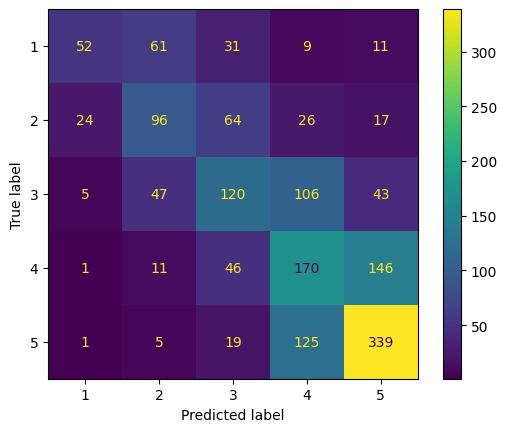

In [180]:
pipeline.fit(x_train, y_train)

pred = pipeline.predict(x_test)

print("Exactitud: ", round(accuracy_score(y_test, pred), 3))
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 3))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 3))
print("F1: ", round(f1_score(y_test, pred, average='weighted'), 3))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

plt.show()

In [194]:
test = pd.Series(["malo", "bueno", "regular", "excelente", "pésimo"])

result = pipeline.predict(test)

for i in range(len(test)):
    print(test[i], ":", result[i])


malo : 2
bueno : 4
regular : 3
excelente : 5
pésimo : 1
